## Imports

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import re
%matplotlib inline

## Settings to enable real-time output from a shell command

In [2]:
from subprocess import Popen, PIPE, STDOUT
from IPython.core.magic import register_line_magic

@register_line_magic
def runrealcmd(command):
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True)
    for line in iter(process.stdout.readline, b''):
        print(line.rstrip().decode('utf-8'))
    process.stdout.close()
    process.wait()

### Download the input file from here:
http://download.smartdatalake.eu/datasets/dblp/dblp_papers.csv.zip

# 1. Vary the similarity threshold

## 1.a Load and optionally edit the config file

In [3]:
config_file_example = '../config.json.example'
config_file = '../config.json'
input_file = '../data/dblp_papers.csv'
output_file = '../data/output/dblp_papers_selfjoin_out.csv'
log_file = '../data/output/log.txt'

In [4]:
params = json.load(open(config_file_example))
params['input_file'] = input_file
del(params['query_file'])
params['output_file'] = output_file
params['log_file'] = log_file
params['join_type'] = 'threshold'
params['mode'] = 'standard'
params['set_column'] = '1'
params['tokens_column'] = '2'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['max_lines'] = '100000'

## 1.b Run the experiment

In [5]:
stats = pd.DataFrame(0, index=[0.5, 0.6, 0.7, 0.8, 0.9], columns=['NumMatches', 'Time'])
for thres in [0.5, 0.6, 0.7, 0.8, 0.9]:
    print('Threshold is {}'.format(thres))
    params['threshold']= str(thres)
    json.dump(params, open(config_file, 'w'), indent=4)
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    x = open(log_file).read()
    stats.loc[thres,'NumMatches'] = re.findall(r'Number of matches: (\d+)', x)[-1]
    stats.loc[thres,'Time'] = re.findall(r'Join algorithm time: (\d+\.\d+) sec', x)[-1]

Threshold is 0.5
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Read time: 0.518574247 sec.
Transform time: 1.070062425 sec.
Collection size: 100000
Join time: 3.206005268 sec. 0m 0s
Number of matches: 1727
Threshold is 0.6
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Read time: 0.552168206 sec.
Transform time: 1.254380379 sec.
Collection size: 100000
Join time: 1.383262028 sec. 0m 0s
Number of matches: 359
Threshold is 0.7
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Read time: 0.605724417 sec.
Transform time: 1.159432882 sec.
Collection size: 100000
Join time: 0.638293309 sec. 0m 0s
Number of matches: 90
Threshold is 0.8
Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Read time: 0.51236

In [6]:
stats

,NumMatches,Time
0.5,1727,3.185504779
0.6,359,1.360694204
0.7,90,0.615376694
0.8,26,0.320779681
0.9,6,0.167787159


## 1.c Plot the results

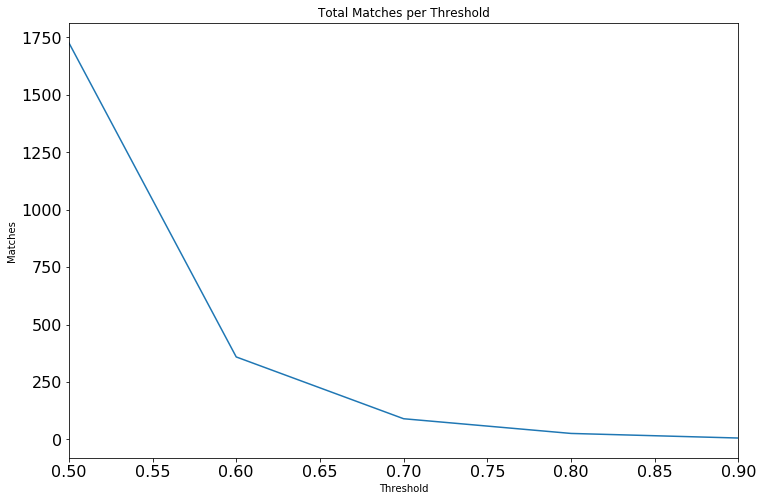

In [7]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Threshold')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Threshold')

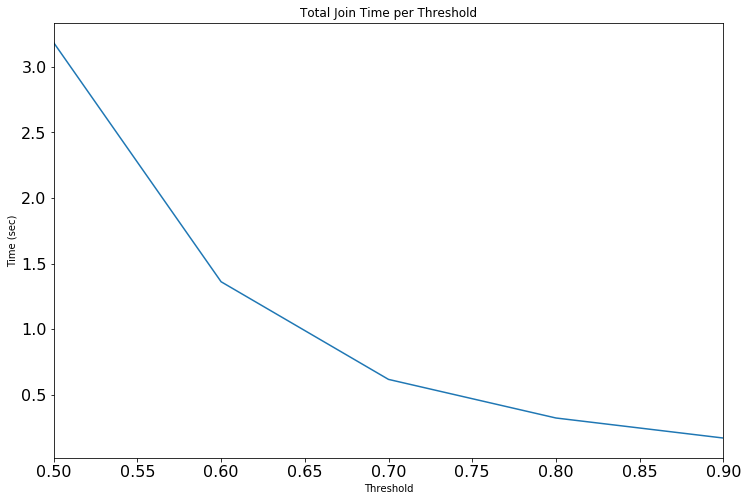

In [8]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Threshold')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Threshold')

# 2. Vary dataset size

## 2.a Load and optionally edit the config file

In [9]:
params = json.load(open(config_file_example))
params['input_file'] = input_file
del(params['query_file'])
params['output_file'] = output_file
params['log_file'] = log_file
params['join_type'] = 'threshold'
params['mode'] = 'standard'
params['set_column'] = '1'
params['tokens_column'] = '2'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['threshold']= '0.8'

## 2.b Run the experiment

In [10]:
stats = pd.DataFrame(0, index=np.arange(.2,1.1,.2), columns=['NumMatches', 'Time'])
size = 1000000
for prop in np.arange(.2,1.1,.2):
    print('Size is {}% or {:,}'.format(int(prop*100), int(prop*size)))
    params['max_lines']= str(int(prop*size))
    json.dump(params, open(config_file, 'w'), indent=4)
    %runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file
    x = open(log_file).read()
    stats.loc[prop,'NumMatches'] = re.findall(r'Number of matches: (\d+)', x)[-1]
    stats.loc[prop,'Time'] = re.findall(r'Join algorithm time: (\d+\.\d+) sec', x)[-1]

Size is 20% or 200,000
Finished reading file. Lines read: 200000. Lines skipped due to errors: 0. Num of sets: 200000. Elements per set: 9.019485
Read time: 1.795297853 sec.
Transform time: 1.924883364 sec.
Collection size: 200000
Join time: 0.632497224 sec. 0m 0s
Number of matches: 119
Size is 40% or 400,000
Finished reading file. Lines read: 400000. Lines skipped due to errors: 0. Num of sets: 400000. Elements per set: 9.030205
Read time: 3.791983358 sec.
Transform time: 3.200894021 sec.
Collection size: 400000
Join time: 2.022031567 sec. 0m 0s
Number of matches: 412
Size is 60% or 600,000
Finished reading file. Lines read: 600000. Lines skipped due to errors: 0. Num of sets: 600000. Elements per set: 8.987783333333333
Read time: 4.698593569 sec.
Transform time: 4.924261179 sec.
Collection size: 600000
Join time: 3.784712111 sec. 0m 0s
Number of matches: 942
Size is 80% or 800,000
Finished reading file. Lines read: 800000. Lines skipped due to errors: 0. Num of sets: 800000. Elements

In [11]:
stats

,NumMatches,Time
0.2,119,0.601069165
0.4,412,1.992138669
0.6,942,3.754182339
0.8,1408,6.062297685
1.0,2036,9.811386367


## 2.c Plot the results

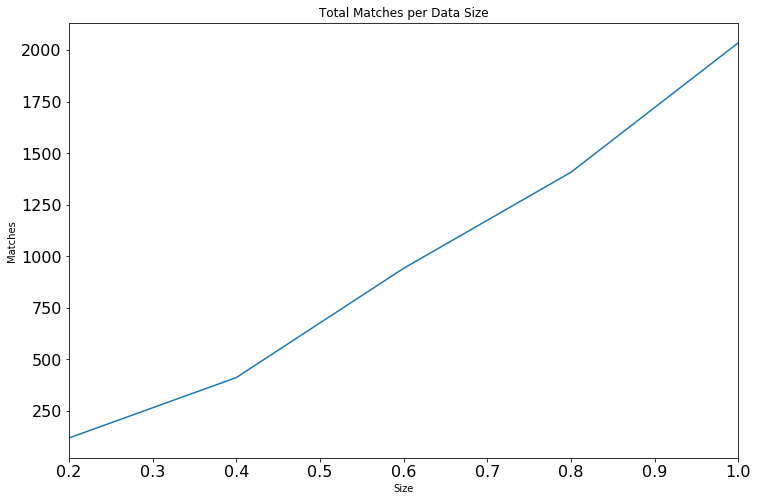

In [12]:
stats.NumMatches = stats.NumMatches.astype('long')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Matches')
ax.set_xlabel('Size')
stats.NumMatches.plot.line(ax=ax, fontsize=16, title='Total Matches per Data Size')

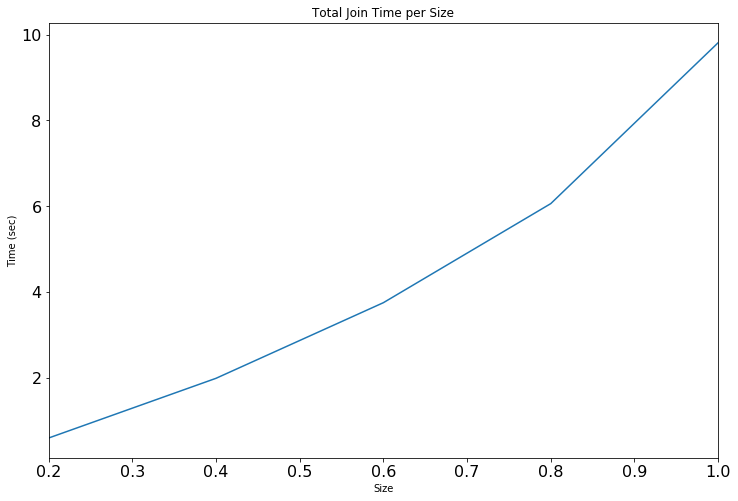

In [13]:
stats.Time = stats.Time.astype('float64')
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Time (sec)')
ax.set_xlabel('Size')
stats.Time.plot.line(ax=ax, fontsize=16, title='Total Join Time per Size')

# 3. Histogram of similarity scores

## 3.a Load and optionally edit the config file

In [14]:
params = json.load(open(config_file_example))
params['input_file'] = input_file
del(params['query_file'])
params['output_file'] = output_file
params['log_file'] = log_file
params['join_type'] = 'threshold'
params['mode'] = 'standard'
params['set_column'] = '1'
params['tokens_column'] = '2'
params['column_delimiter'] = ';'
params['token_delimiter'] = ' '
params['threshold']= '0.6'
params['max_lines'] = '100000'
json.dump(params, open(config_file, 'w'), indent=4)

## 3.b Run the experiment

In [15]:
%runrealcmd java -jar ../target/simjoin-0.0.1-SNAPSHOT-jar-with-dependencies.jar $config_file

Finished reading file. Lines read: 100000. Lines skipped due to errors: 0. Num of sets: 100000. Elements per set: 8.79757
Read time: 0.504609349 sec.
Transform time: 1.07224363 sec.
Collection size: 100000
Join time: 1.230956992 sec. 0m 0s
Number of matches: 359


## 3.c Plot the results

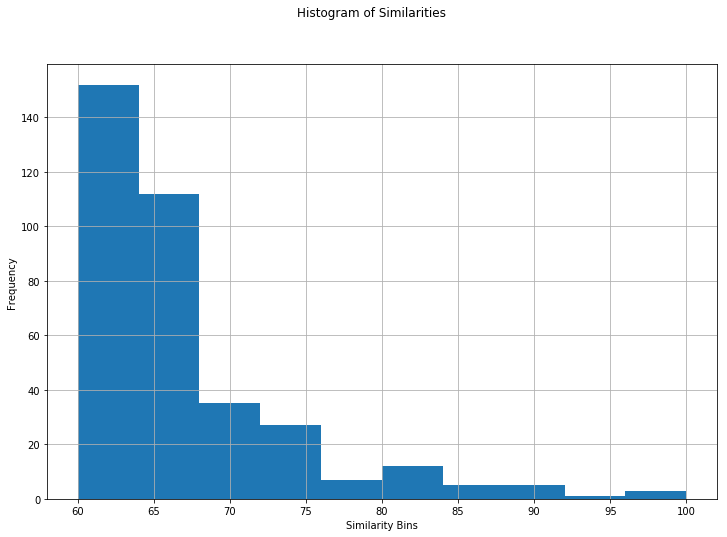

In [16]:
out1 = pd.read_csv(output_file, header=None, names=['Paper_ID_1', 'Paper_ID_2', 'Similarity'])
out1['Bin'] = (out1.Similarity*100).astype('int')
out1.head()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Similarity Bins')
ax.set_ylabel('Frequency')
pl.suptitle("Histogram of Similarities")
out1.Bin.hist()